In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import baltic as bt

tre = bt.loadNewick("data/tree.nwk")
tre.treeStats()

nn = {}

for o in tre.Objects:
    if o.branchType!='leaf':
        if o==tre.root:
            o.name = "root"
        else:
            o.name = "ac"
    print(f"{o.name}: ({o.x},{o.y})")

    nn[o.name] = o


Tree height: 5.000000
Tree length: 11.000000
strictly bifurcating tree
annotations present

Numbers of objects in tree: 5 (2 nodes and 3 leaves)

root: (0.0,1.75)
ac: (3.0,1.0)
B: (5.0,1.5)
A: (4.0,0.5)
C: (5.0,2.5)


In [39]:
def base_fig(ax, label=True, color=True, points=True, plot=True):
    tre.drawTree(order=[nn["A"], nn["B"], nn["C"]])
    if plot:
        tre.plotTree(ax, x_attr=lambda k: k.x, colour=lambda k: 'k')
    if points:
        tre.plotPoints(ax,
                    target=lambda k: k.branchType=="leaf", # turn off internal node colors
                    size=50,
                    colour=lambda k: 'k',
                    )
        if color:
            tre.plotPoints(ax,
                        target=lambda k: k.branchType=="leaf", # turn off internal node colors
                        size=40,
                        colour=lambda k: 'steelblue' if k.name=="C" else "indianred",
                        )
    if label:
        tre.addText(ax, 
                    target=lambda k: k.branchType=="leaf", # turn off internal node labels
                    x_attr=lambda k: k.x+.2,
                    y_attr=lambda k: k.y-.05,
                    fontsize=20)
    ax.axis('off')

    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(0,3)

    return ax, tre

/var/folders/9n/v2y56hkx127fvfrtvpfxnyk80000gn/T/ipykernel_26823/3915984603.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


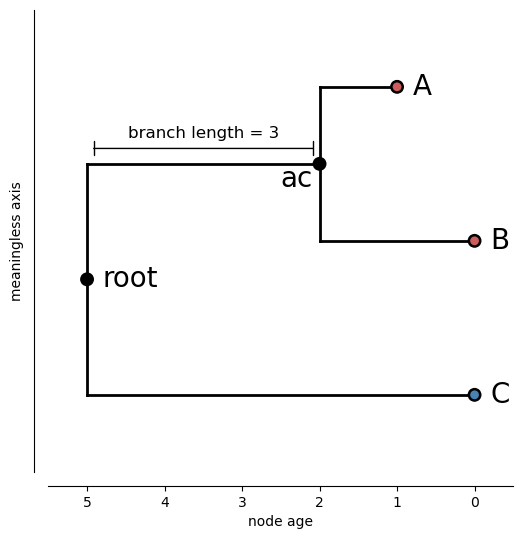

In [41]:
# labeled phylogeny
fig, ax = plt.subplots(figsize=(6,6))
ax, tre = base_fig(ax)

tre.plotPoints(ax,
               target=lambda k: not k.branchType=="leaf",
               size=50)
tre.addText(ax,
            target=lambda k: k.name=="ac",
            x_attr=lambda k: k.x-.5,
            y_attr=lambda k: k.y-.15,
            fontsize=20)
tre.addText(ax,
            target=lambda k: k.name=="root",
            x_attr=lambda k: k.x+.2,
            y_attr=lambda k: k.y-.05,
            fontsize=20)

ax.axis("on")
labels = [ str(i) for i in range(6,-1,-1)]
ax.set_xticklabels(labels)
ax.set_xlabel("node age")
ax.set_ylabel("meaningless axis")
ax.set_yticklabels([])
ax.set_yticks([])
[ax.spines[loc].set_visible(False) for loc in ['top','right']]
sns.despine(ax=ax, trim=False, offset=10)

ax.annotate('', xy=(0.05, 2.1), xytext=(2.95, 2.1), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|'}, fontsize=5)
ax.annotate('branch length = 3', xy=(1.5, 2.2), ha='center', va='center',fontsize=12)

plt.savefig("../chapters/introduction/image/treeDiagram.png")


/var/folders/9n/v2y56hkx127fvfrtvpfxnyk80000gn/T/ipykernel_26823/3049143644.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
/var/folders/9n/v2y56hkx127fvfrtvpfxnyk80000gn/T/ipykernel_26823/3049143644.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


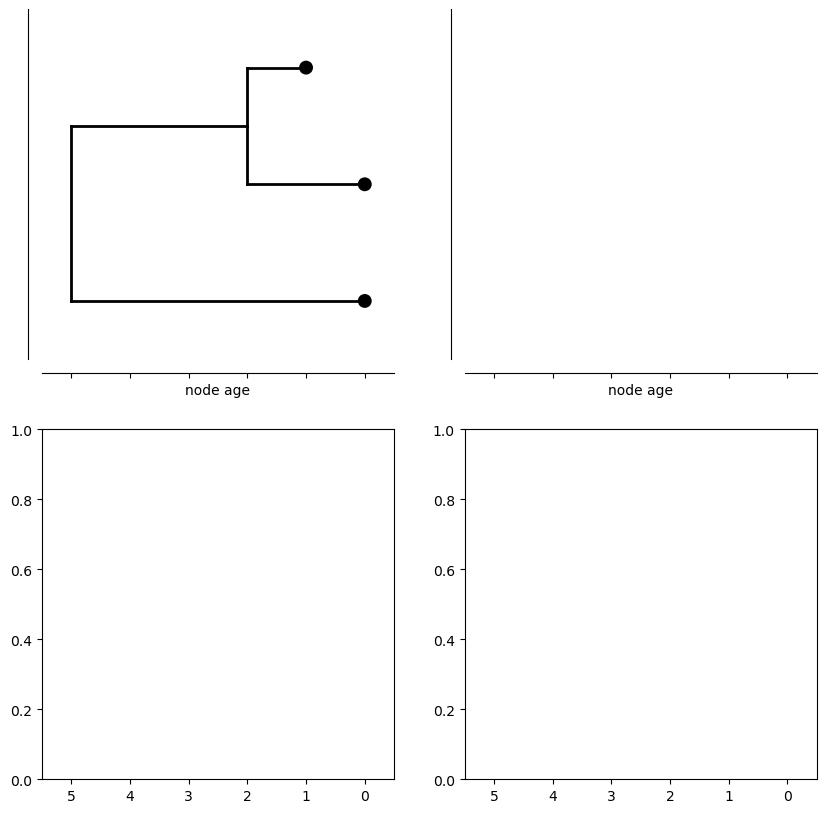

In [43]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols=2,nrows=2,sharex=True,figsize=(10,10))

ax1, tre1 = base_fig(ax1, label=False, color=False)
ax1.axis("on")
labels = [ str(i) for i in range(6,-1,-1)]
ax1.set_xticklabels(labels)
ax1.set_xlabel("node age")
ax1.set_yticklabels([])
ax1.set_yticks([])
[ax1.spines[loc].set_visible(False) for loc in ['top','right','left']]
sns.despine(ax=ax1, trim=False, offset=10)

ax2, tre2 = base_fig(ax2, label=False, color=False, points=False, plot=False)
ax2.axis("on")
labels = [ str(i) for i in range(6,-1,-1)]
ax2.set_xticklabels(labels)
ax2.set_xlabel("node age")
ax2.set_yticklabels([])
ax2.set_yticks([])
[ax2.spines[loc].set_visible(False) for loc in ['top','right','left']]
sns.despine(ax=ax2, trim=False, offset=10)